In [3]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import datetime
from datetime import datetime

In [4]:
df = pd.read_csv(r"D:\Data Analyst\Online Shop Customer Sales Data.csv")

In [5]:
df.head(5)

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_id,65796.0,537205.500000,18993.813493,504308.000,520756.75000,537205.50,553654.250,570103.0
Age,65796.0,39.592696,13.825466,16.000,28.00000,40.00,51.000,63.0
Gender,65796.0,0.671348,0.469727,0.000,0.00000,1.00,1.000,1.0
Revenue_Total,65796.0,27.732935,14.941878,0.500,15.30000,30.10,37.600,59.9
N_Purchases,65796.0,3.992477,2.004370,1.000,2.00000,4.00,6.000,7.0
Purchase_VALUE,65796.0,15.968699,13.229295,0.005,4.81975,12.64,24.752,59.9
Pay_Method,65796.0,1.308651,1.081959,0.000,0.00000,1.00,2.000,3.0
Time_Spent,65796.0,598.925603,277.833635,120.000,358.00000,598.00,840.000,1080.0
Browser,65796.0,0.630935,0.996407,0.000,0.00000,0.00,1.000,3.0
Newsletter,65796.0,0.151027,0.358078,0.000,0.00000,0.00,0.000,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65796 entries, 0 to 65795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     65796 non-null  int64  
 1   Age             65796 non-null  int64  
 2   Gender          65796 non-null  int64  
 3   Revenue_Total   65796 non-null  float64
 4   N_Purchases     65796 non-null  int64  
 5   Purchase_DATE   65796 non-null  object 
 6   Purchase_VALUE  65796 non-null  float64
 7   Pay_Method      65796 non-null  int64  
 8   Time_Spent      65796 non-null  int64  
 9   Browser         65796 non-null  int64  
 10  Newsletter      65796 non-null  int64  
 11  Voucher         65796 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 6.0+ MB


**Überblick der Daten**

In [8]:
df["N_Purchases"].value_counts()

N_Purchases
1    9519
2    9427
3    9426
7    9418
5    9408
6    9340
4    9258
Name: count, dtype: int64

In [9]:
df.duplicated().value_counts()

False    65796
Name: count, dtype: int64

In [10]:
df["Browser"].value_counts()

Browser
0    42076
1    13135
3     7208
2     3377
Name: count, dtype: int64

In [11]:
df["Newsletter"].value_counts() 

Newsletter
0    55859
1     9937
Name: count, dtype: int64

In [12]:
df["Voucher"].value_counts() # Gutscheine

Voucher
0    49330
1    16466
Name: count, dtype: int64

In [13]:
df["Gender"].value_counts()

Gender
1    44172
0    21624
Name: count, dtype: int64

In [14]:
df["Pay_Method"].value_counts()

Pay_Method
1    19754
0    19075
2    14551
3    12416
Name: count, dtype: int64

**Diagramme zur Veranschaulichung**

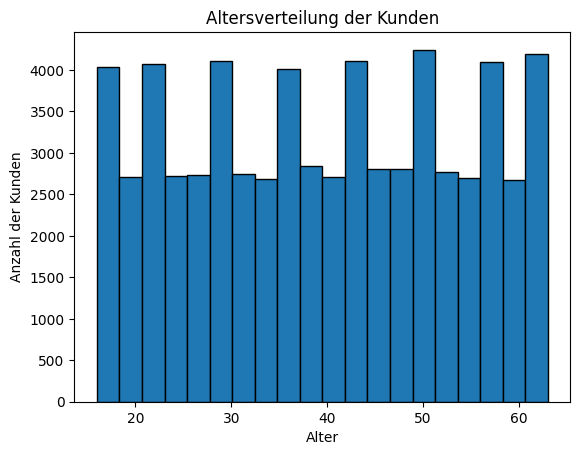

In [15]:
plt.hist(df['Age'].dropna(), bins=20, edgecolor='black')
plt.title('Altersverteilung der Kunden')
plt.xlabel('Alter')
plt.ylabel('Anzahl der Kunden')
plt.show()

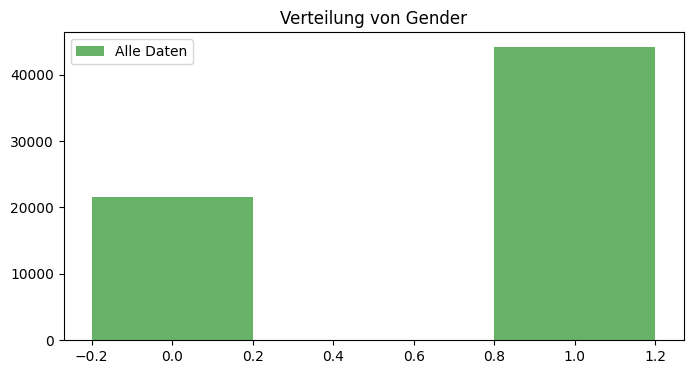

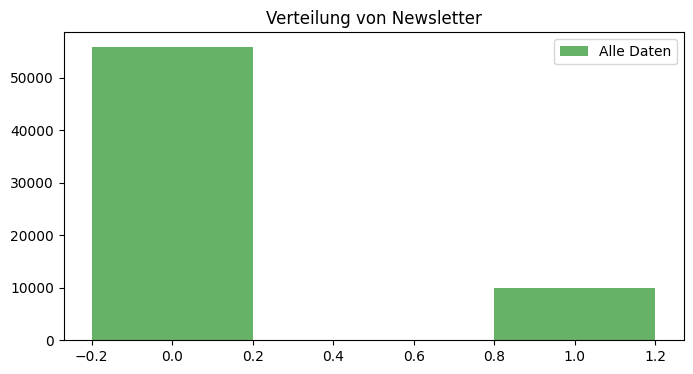

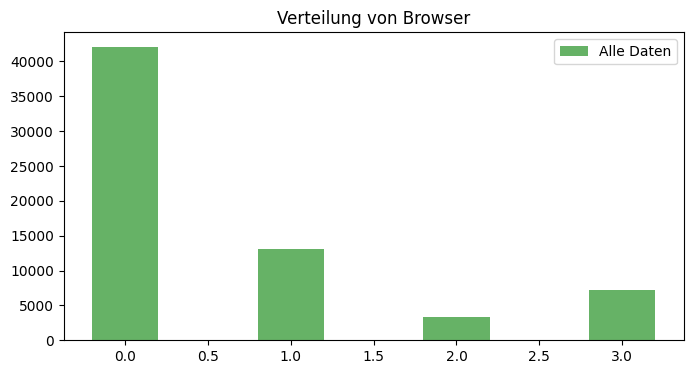

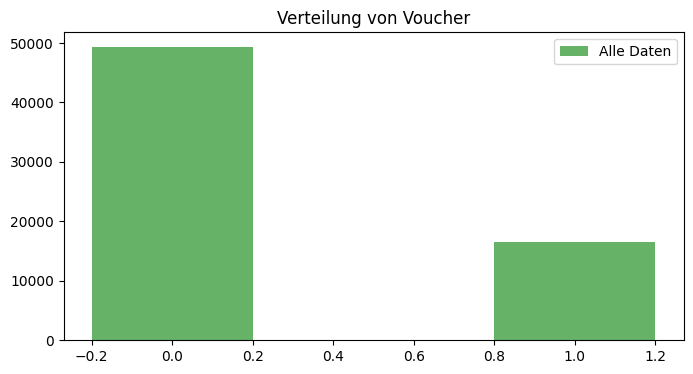

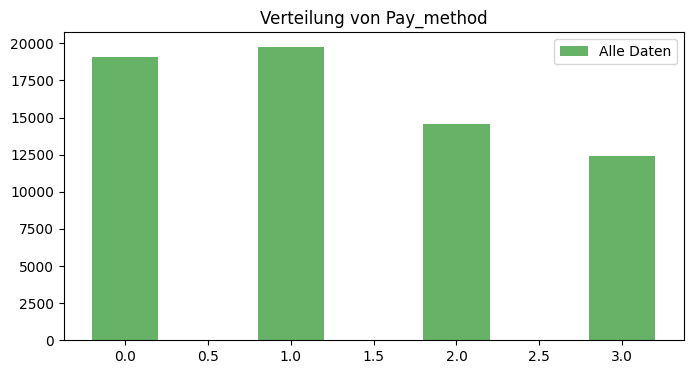

In [16]:
for column in ['Gender' , 'Newsletter', 'Browser' , 'Voucher' , 'Pay_Method']:
    plt.figure(figsize=(8, 4))
 
    shop_count = df[column].value_counts().sort_index()

    plt.bar(shop_count.index, shop_count.values, width=0.4, align='center', color='green', alpha=0.6, label='Alle Daten')
    plt.title(f'Verteilung von {column.capitalize()}')
    plt.legend()
    plt.show()

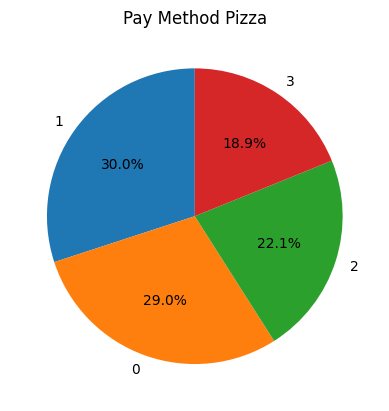

In [17]:
pay_method = df['Pay_Method'].value_counts()
plt.pie(pay_method, labels=["1","0","2","3"] ,autopct='%1.1f%%', startangle=90)
plt.title('Pay Method Pizza')
plt.show()

In [18]:
df.head(5)

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


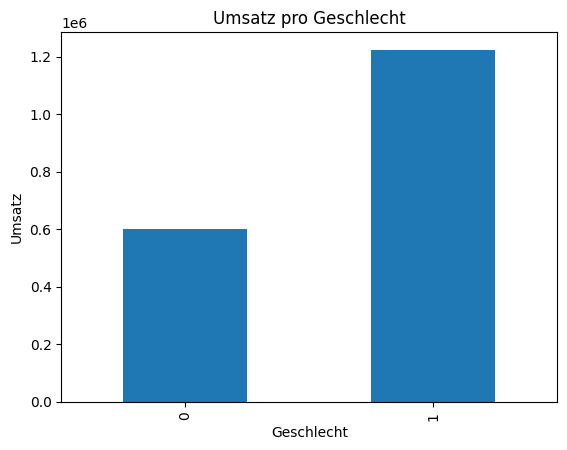

In [19]:
revenue_by_gender = df.groupby('Gender')['Revenue_Total'].sum()

revenue_by_gender.plot(kind='bar')
plt.title('Umsatz pro Geschlecht')
plt.xlabel('Geschlecht')
plt.ylabel('Umsatz')
plt.show()

In [20]:
df['Purchase_DATE'] = pd.to_datetime(df['Purchase_DATE'], format='%d.%m.%y') # Datum zu DateTime Objekt

In [21]:
df['day_of_week'] = df['Purchase_DATE'].dt.day_name()
df.head(5)

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,day_of_week
0,504308,53,0,45.3,2,2021-06-22,24.915,1,885,0,0,0,Tuesday
1,504309,18,1,36.2,3,2021-12-10,2.896,2,656,0,0,1,Friday
2,504310,52,1,10.6,1,2021-03-14,10.600,0,761,0,1,0,Sunday
3,504311,29,0,54.1,5,2021-10-25,43.280,1,906,0,1,0,Monday
4,504312,21,1,56.9,1,2021-09-14,56.900,1,605,0,1,0,Tuesday


In [22]:
df['month'] = df['Purchase_DATE'].dt.month_name()
df.head(5)

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,day_of_week,month
0,504308,53,0,45.3,2,2021-06-22,24.915,1,885,0,0,0,Tuesday,June
1,504309,18,1,36.2,3,2021-12-10,2.896,2,656,0,0,1,Friday,December
2,504310,52,1,10.6,1,2021-03-14,10.600,0,761,0,1,0,Sunday,March
3,504311,29,0,54.1,5,2021-10-25,43.280,1,906,0,1,0,Monday,October
4,504312,21,1,56.9,1,2021-09-14,56.900,1,605,0,1,0,Tuesday,September


In [23]:
df["month"].value_counts() # keine Besonderheiten (Februar etwa 10% weniger)

month
January      5766
December     5684
October      5611
August       5590
May          5561
September    5505
March        5453
April        5433
July         5430
June         5421
November     5364
February     4978
Name: count, dtype: int64

In [24]:
df["day_of_week"].value_counts() # keine Besonderheiten

day_of_week
Thursday     9512
Saturday     9449
Friday       9420
Wednesday    9420
Sunday       9409
Tuesday      9396
Monday       9190
Name: count, dtype: int64

In [25]:
df['year'] = df['Purchase_DATE'].dt.year
df.head(5)

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,day_of_week,month,year
0,504308,53,0,45.3,2,2021-06-22,24.915,1,885,0,0,0,Tuesday,June,2021
1,504309,18,1,36.2,3,2021-12-10,2.896,2,656,0,0,1,Friday,December,2021
2,504310,52,1,10.6,1,2021-03-14,10.600,0,761,0,1,0,Sunday,March,2021
3,504311,29,0,54.1,5,2021-10-25,43.280,1,906,0,1,0,Monday,October,2021
4,504312,21,1,56.9,1,2021-09-14,56.900,1,605,0,1,0,Tuesday,September,2021


In [26]:
df["year"].value_counts()

year
2021    65619
2022      177
Name: count, dtype: int64

In [27]:
df.query("year == 2022").head(5)

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,day_of_week,month,year
211,504519,24,1,27.9,3,2022-01-01,26.784,3,332,2,0,0,Saturday,January,2022
1293,505601,33,1,13.0,4,2022-01-01,3.900,1,353,0,0,1,Saturday,January,2022
1626,505934,59,0,35.1,5,2022-01-01,1.404,1,201,0,1,0,Saturday,January,2022
1979,506287,43,1,23.0,4,2022-01-01,10.580,1,394,1,0,0,Saturday,January,2022
2302,506610,17,1,35.5,6,2022-01-01,20.590,2,808,0,0,0,Saturday,January,2022


**Altersgruppen erstellen**

In [28]:
df['Age_Groups'] = ''

for row in df.iterrows():
    age = row[1]['Age']
    if age <= 15:
        df.at[row[0], 'Age_Groups'] = 'Young'
    elif 15 < age <= 30:
        df.at[row[0], 'Age_Groups'] = 'Middle-Aged'
    elif 30 < age <= 45:
        df.at[row[0], 'Age_Groups'] = 'Old'
    else:
        df.at[row[0], 'Age_Groups'] = 'Senior'



In [29]:
df["Age_Groups"].value_counts()

Age_Groups
Senior         24887
Old            20521
Middle-Aged    20388
Name: count, dtype: int64

In [30]:
df.groupby("Age_Groups")["Revenue_Total"].sum()

Age_Groups
Middle-Aged    566305.9
Old            569148.3
Senior         689262.0
Name: Revenue_Total, dtype: float64

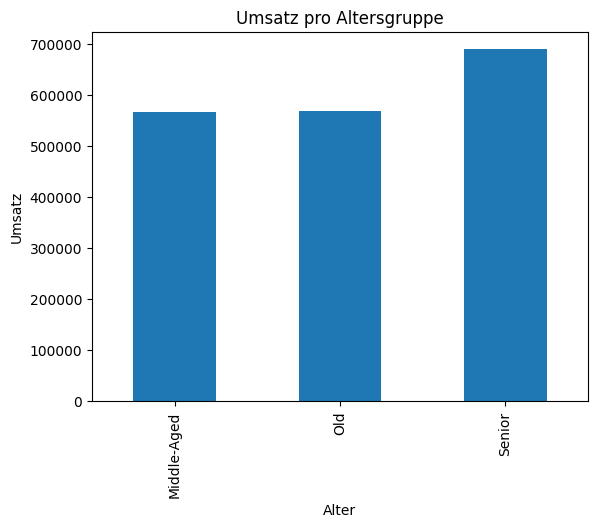

In [31]:
revenue_by_age = df.groupby("Age_Groups")["Revenue_Total"].sum()

revenue_by_age.plot(kind='bar')
plt.title('Umsatz pro Altersgruppe')
plt.xlabel('Alter')
plt.ylabel('Umsatz')
plt.show()

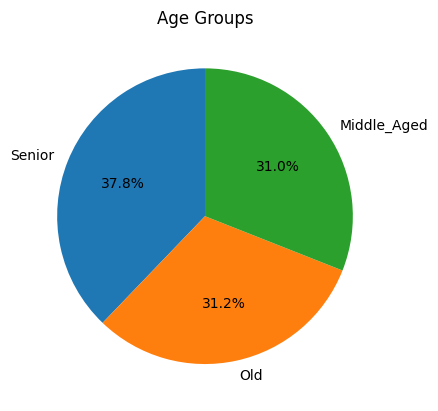

In [32]:
age_groups = df['Age_Groups'].value_counts()
plt.pie(age_groups, labels=["Senior","Old","Middle_Aged"] ,autopct='%1.1f%%', startangle=90)
plt.title('Age Groups')
plt.show()

In [33]:
df.groupby("Age_Groups")["Time_Spent"].mean()

Age_Groups
Middle-Aged    599.529527
Old            598.981872
Senior         598.384458
Name: Time_Spent, dtype: float64

- Nehmen sich Voucher mehr Zeit etc.
- Gibt es besondere Monate.
- Hat die Payment Method Einfluss auf Dinge.
- Hat der Newsletter Einfluss auf Dinge.

In [34]:
df.groupby("Newsletter")["Time_Spent"].mean()

Newsletter
0    598.484488
1    601.405253
Name: Time_Spent, dtype: float64

In [35]:
df.groupby("Newsletter")["Voucher"].value_counts() # etwa 1 zu 3 , also keine Auswirkung

Newsletter  Voucher
0           0          41923
            1          13936
1           0           7407
            1           2530
Name: count, dtype: int64

In [36]:
df.groupby("Pay_Method")["Voucher"].value_counts() # Pay_Method hat keine Auswirkung

Pay_Method  Voucher
0           0          14236
            1           4839
1           0          14807
            1           4947
2           0          10899
            1           3652
3           0           9388
            1           3028
Name: count, dtype: int64

In [37]:
df.groupby("Age_Groups")["Pay_Method"].value_counts()

Age_Groups   Pay_Method
Middle-Aged  1             6101
             0             5932
             2             4479
             3             3876
Old          1             6232
             0             5938
             2             4464
             3             3887
Senior       1             7421
             0             7205
             2             5608
             3             4653
Name: count, dtype: int64

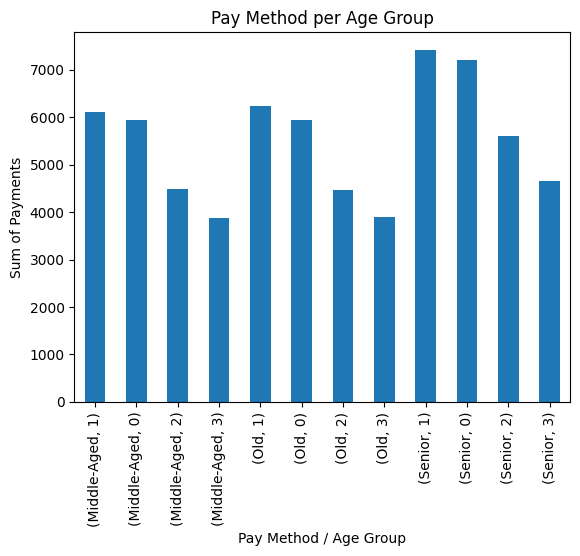

In [38]:
pay_method_by_age = df.groupby("Age_Groups")["Pay_Method"].value_counts()
pay_method_by_age.plot(kind='bar')
plt.title('Pay Method per Age Group')
plt.xlabel('Pay Method / Age Group')
plt.ylabel('Sum of Payments')
plt.show()